In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Fire.xlsx')

In [3]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [5]:
df['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [6]:
df['FUEL'] = pd.Categorical(df['FUEL']).codes

In [7]:
y = df.pop('STATUS')
x = df

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=1)

In [11]:
from tensorflow.keras import Sequential
from keras import layers

model = Sequential()

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/30
175/175 [==============================] - 1s 1ms/step - loss: 0.1691 - accuracy: 0.9266 - val_loss: 0.1704 - val_accuracy: 0.9215
Epoch 2/30
175/175 [==============================] - 0s 875us/step - loss: 0.1644 - accuracy: 0.9282 - val_loss: 0.1708 - val_accuracy: 0.9212
Epoch 3/30
175/175 [==============================] - 0s 889us/step - loss: 0.1635 - accuracy: 0.9264 - val_loss: 0.1716 - val_accuracy: 0.9219
Epoch 4/30
175/175 [==============================] - 0s 879us/step - loss: 0.1677 - accuracy: 0.9256 - val_loss: 0.2008 - val_accuracy: 0.9094
Epoch 5/30
175/175 [==============================] - 0s 868us/step - loss: 0.1654 - accuracy: 0.9286 - val_loss: 0.1638 - val_accuracy: 0.9262
Epoch 6/30
175/175 [==============================] - 0s 949us/step - loss: 0.1650 - accuracy: 0.9282 - val_loss: 0.1827 - val_accuracy: 0.9194
Epoch 7/30
175/175 [==============================] - 0s 863us/step - loss: 0.1648 - accuracy: 0.9259 - val_loss: 0.1690 - val_accuracy: 0

(0.0, 1.0)

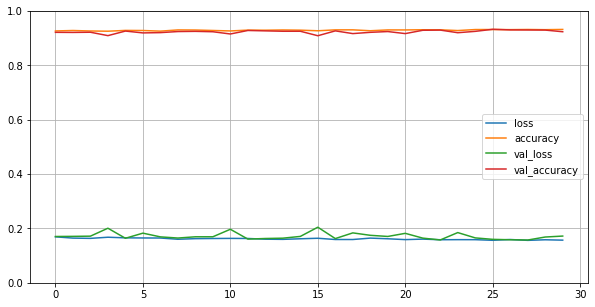

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [20]:
model.evaluate(x_test, y_test, batch_size=64)

55/55 [==============================] - 0s 794us/step - loss: 0.1707 - accuracy: 0.9240


[0.17069683969020844, 0.9240469932556152]

<AxesSubplot:>

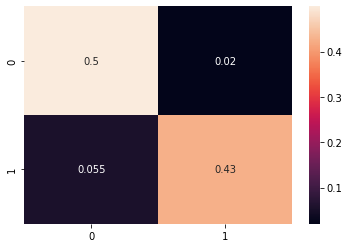

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.array(y_test).reshape([len(y_test), 1])
y_pred = [1 if x>.5 else 0 for x in model.predict(x_test)]

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm/np.sum(cm), annot=True)